In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from pmdarima import auto_arima 

sns.set()
# https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city#

In [4]:
#data = pd.read_csv("Tetuan_City_power_consumption.csv")
data = pd.read_csv("Tetuan_City_power_consumption.csv" ) # ,index_col='DateTime')  # Should I switche the index to Datetime?
data.columns = data.columns.str.replace(' ','_')
#data['DateTime'] = pd.to_datetime(data['DateTime'])
data

,DateTime,Temperature,Humidity,Wind_Speed,general_diffuse_flows,diffuse_flows,Zone_1_Power_Consumption,Zone_2__Power_Consumption,Zone_3__Power_Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind_Speed                 52416 non-null  float64
 4   general_diffuse_flows      52416 non-null  float64
 5   diffuse_flows              52416 non-null  float64
 6   Zone_1_Power_Consumption   52416 non-null  float64
 7   Zone_2__Power_Consumption  52416 non-null  float64
 8   Zone_3__Power_Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
data.DateTime = pd.to_datetime(data.DateTime)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind_Speed                 52416 non-null  float64       
 4   general_diffuse_flows      52416 non-null  float64       
 5   diffuse_flows              52416 non-null  float64       
 6   Zone_1_Power_Consumption   52416 non-null  float64       
 7   Zone_2__Power_Consumption  52416 non-null  float64       
 8   Zone_3__Power_Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [8]:
data.set_index('DateTime', inplace=True)

# Zone 1

In [9]:
data_zone1 = data[['Zone_1_Power_Consumption']]

In [10]:
# Changing frequency to daily
data_zone1 = data_zone1.resample('D').sum()

In [11]:
data_zone1

,Zone_1_Power_Consumption
DateTime,
2017-01-01,4.098993e+06
2017-01-02,4.157207e+06
2017-01-03,4.400992e+06
2017-01-04,4.419336e+06
2017-01-05,4.435619e+06
...,...
2017-12-26,4.321941e+06
2017-12-27,4.315243e+06
2017-12-28,4.358449e+06


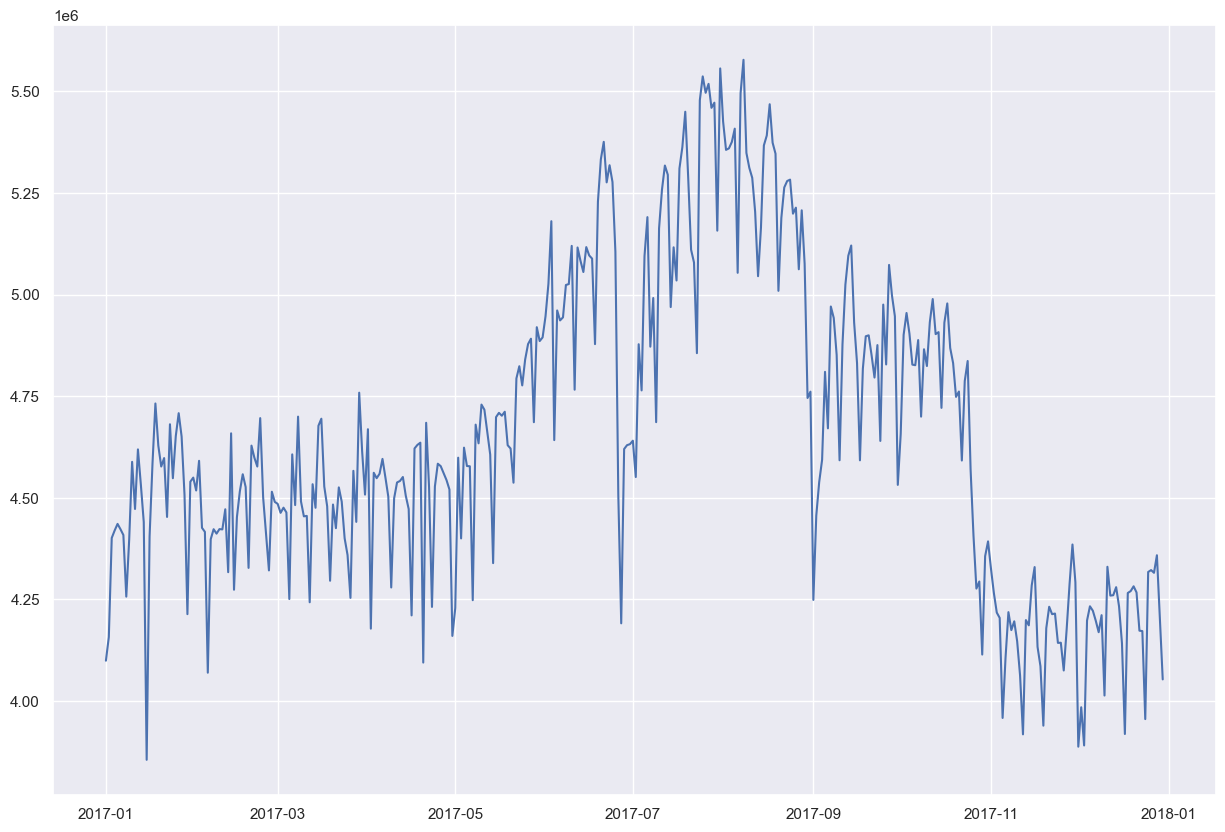

In [12]:
fig =plt.figure(figsize=(15,10))
plt.plot(data_zone1)

### Checking for seanality

In [13]:
# %pip install statsmodels

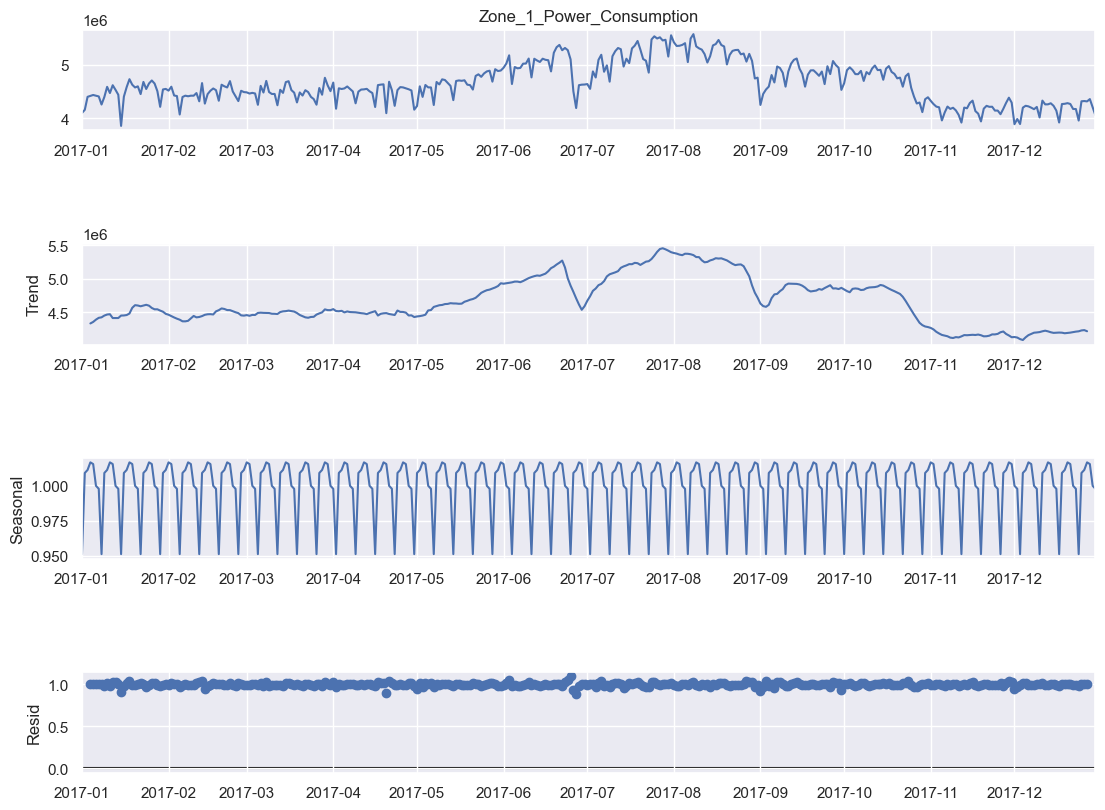

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Question about perioud and freq
#data_zone1.index.freq = 'YS'

# Specify multiplicative model  
fig = seasonal_decompose(data_zone1['Zone_1_Power_Consumption'],model='mul').plot();
fig.set_size_inches((12, 9))
plt.show()

![](assets/pd_offset_codes.png)

In [15]:
type(data_zone1)

pandas.core.frame.DataFrame

In [16]:
data_zone1

,Zone_1_Power_Consumption
DateTime,
2017-01-01,4.098993e+06
2017-01-02,4.157207e+06
2017-01-03,4.400992e+06
2017-01-04,4.419336e+06
2017-01-05,4.435619e+06
...,...
2017-12-26,4.321941e+06
2017-12-27,4.315243e+06
2017-12-28,4.358449e+06


In [17]:
# %pip install pmdarima

In [18]:
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX 
# from pmdarima import auto_arima 

# def time_series_analysis( data, column, test_size, seasonal_status=False, seasonal_period=1 ):
#     df_ = data[[column]]
    
#     #Spliting data to train and test
#     train_test_cutoff = int(len(df_)*(1-test_size))
#     train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
#     test = df_.iloc[train_test_cutoff:]
    
#     # Finding best parameter
     
#     best_fit = auto_arima(df_[[column]],trace=True ,
#                           seasonal=seasonal_status, m=seasonal_period, error_action='ignore')
    
#     # Fitting our ARIMA or SARIMA model 
#     from statsmodels.tsa.arima.model import ARIMA
    
    
#     if seasonal_status:  # It is deciding whether use Sarima or arima model based on "seasonal_status" input
#         model = SARIMAX(train[column].astype(float), 
#                         order=best_fit.order, 
#                         seasonal_order=best_fit.seasonal_order).fit()
#     else:
#         model = ARIMA(train[column].astype(float), order=best_fit.order).fit() # best_fit.order is getting the order of the best fitted model from line above
#     # Casting the training data as float is not a required step
#     # This is to prevent us from getting a dtype error when predicting 

#     # Predicting 

#     # We want to start our predictions at the end of our training data 
#     start = len(train)

#     # We want to predict our entire DF - 1 because the end is inclusive. 
#     # Our df has 264 rows, but rows start at 0 and end at row 263 
#     end = len(train) + len(test) - 1

#     predictions = model.predict(start=start, end=end, typ='levels').rename(f'best_fit{best_fit.order}')
    
    
#     # Plotting our predictions 

#     test[column].plot(figsize=(12,8), legend=True)
#     predictions.plot(legend=True);
#     plt.show()
    
#     # Model Evaluation 
#     from statsmodels.tools.eval_measures import rmse

#     print(f'rmse: {rmse(test[column],predictions)}')
#     # We can also compare the mean values for our predictions and mean values for the test set to see how we 
#     # are doing

#     print(f'Test Mean: {test[column].mean()}')
#     print(f'Prediction Mean: {predictions.mean()}')
    
#     if seasonal_status:  # It is deciding whether use Sarimax or arima model based on "seasonal_status" input

#         full_data_model =SARIMAX(df_[column].astype(float), 
#                                                     order=best_fit.order, 
#                                                     seasonal_order=best_fit.seasonal_order).fit()
#     else:
            
#         full_data_model = ARIMA(df_[column].astype(float), order=best_fit.order,).fit()

#     #model.summary()

#     forecast = full_data_model.predict(start=len(df_), end=len(df_)+11, typ='levels').rename('ARIMA Forecast')

#     df_[column].plot(legend=True,figsize=(12,6))
#     forecast.plot(legend=True);
    

In [19]:
# time_series_analysis( data_zone1, column='Zone_1_Power_Consumption', test_size=0.2, seasonal_status=True, seasonal_period=7 )

# Step by Step approach

In [20]:
df_ = data_zone1[['Zone_1_Power_Consumption']]
test_size = 0.15
column = 'Zone_1_Power_Consumption'
seasonal_status =True
seasonal_period = 7

In [21]:
#Spliting data to train and test
train_test_cutoff = int(len(df_)*(1-test_size))
train = df_.iloc[:train_test_cutoff] # Drop the last 27 years of our data
test = df_.iloc[train_test_cutoff:]

In [22]:
# test

In [23]:
# Finding best parameter

best_fit = auto_arima(df_[[column]],trace=True ,
                      information_criterion='aic',
                      seasonal=seasonal_status,
                      D=1,
                      m=seasonal_period, 
                      error_action='ignore')

# best_fit = auto_arima(df_[[column]], 
#                          start_p=1, start_q=1,  
#                          test='adf',
#                          #max_p=3, max_q=3, 
#                          m=7,
#                          start_P=0, 
#                          #max_P=3, max_Q=3,
#                          seasonal=True,
#                          d=None, 
#                          D=1, max_D=2,
#                          trace=True,
#                          error_action='ignore',  
#                          suppress_warnings=True, 
#                          stepwise=True,
#                          maxiter=80)

# data, start_p=1, start_q=1,
#                          test='adf',
#                          max_p=3, max_q=3, m=7,
#                          start_P=0, seasonal=True,
#                          d=None, D=1, trace=True,
#                          error_action='ignore',  
#                          suppress_warnings=True, 
#                          stepwise=True

#ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=9703.383, Time=0.60 sec

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=9659.326, Time=1.82 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=9804.872, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=9707.475, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=9718.490, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=9802.978, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=9670.806, Time=1.09 sec
 ARIMA(2,0,2)(1,1,0)[7] intercept   : AIC=9702.911, Time=1.01 sec
 ARIMA(2,0,2)(2,1,1)[7] intercept   : AIC=9659.565, Time=2.69 sec
 ARIMA(2,0,2)(1,1,2)[7] intercept   : AIC=9655.163, Time=2.53 sec
 ARIMA(2,0,2)(0,1,2)[7] intercept   : AIC=9661.147, Time=2.47 sec
 ARIMA(2,0,2)(2,1,2)[7] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=9652.265, Time=1.59 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=9651.870, Time=1.19 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=9669.258, Time=0.63 sec
 ARIMA(1,0,2)(1,1,1)[7] intercept   : 

In [24]:
order_ = best_fit.order
seasonal_order_ = best_fit.seasonal_order
# ARIMA(3,0,3)(1,2,3)[7] 
#ARIMA(3,0,1)(2,1,2)[7] intercept   : AIC=9649.417, Time=4.45 sec
#ARIMA(3,0,4)(1,1,1)[7] intercept   : AIC=9643.436, Time=2.04 sec
#(3, 0, 2)

# order_ = (2,0,2)
# seasonal_order_ = (1,1,2,7)

In [25]:
order_

(3, 0, 4)

In [26]:
seasonal_order_

(1, 1, 1, 7)

In [27]:
if seasonal_status:  # It is deciding whether use Sarima or arima model based on "seasonal_status" input
        model = SARIMAX(train[column].astype(float), 
                        order= order_, 
                        seasonal_order= seasonal_order_).fit()
        print("SARIMAX model")
else:
        model = ARIMA(train[column].astype(float), order=order_).fit()
        print("ARIMA model")
# model = SARIMAX(train[column].astype(float), 
#                         order=order_, 
#                         seasonal_order_=seasonal_order_).fit()

SARIMAX model


C:\Users\Asus\anaconda3\envs\tensor_playground\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
# Predicting 

# We want to start our predictions at the end of our training data 
start = len(train)

# We want to predict our entire DF - 1 because the end is inclusive. 
# Our df has 264 rows, but rows start at 0 and end at row 263 
end = len(train) + len(test) - 1

predictions = model.predict(start=start, end=end, typ='levels').rename(f'best_fit{order_}')

In [29]:
# predictions

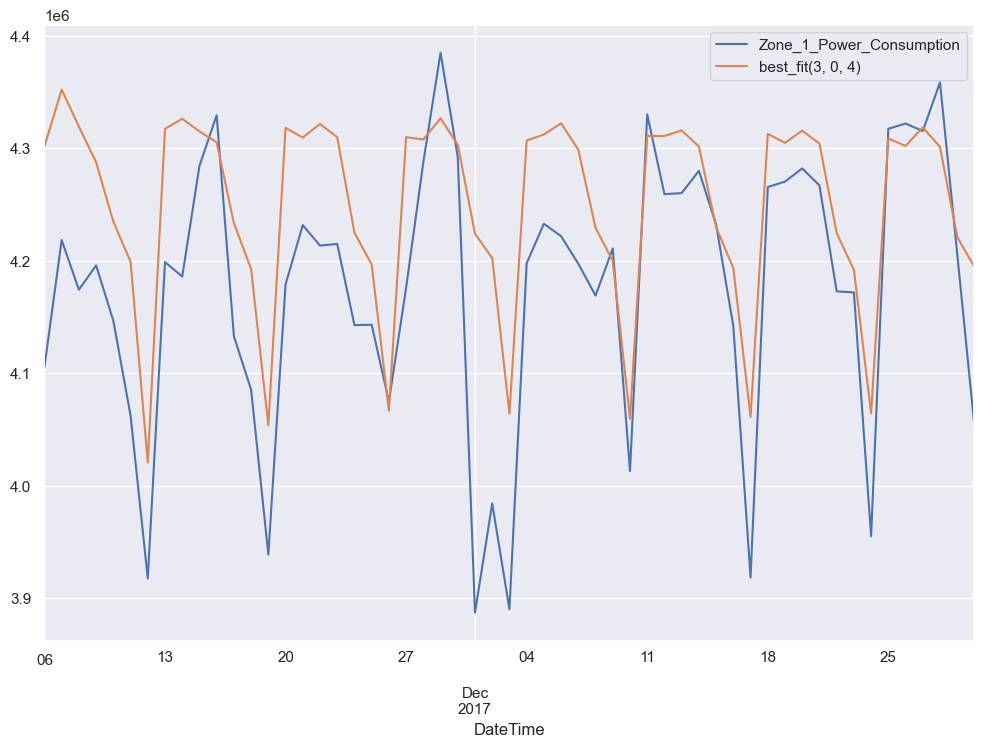

In [30]:
# Plotting our predictions 

test[column].plot(figsize=(12,8), legend=True)
predictions.plot(legend=True);
plt.show()

In [31]:
# Model Evaluation 
from statsmodels.tools.eval_measures import rmse

print(f'rmse: {rmse(test[column],predictions)}')
# We can also compare the mean values for our predictions and mean values for the test set to see how we 
# are doing

print(f'Test Mean: {test[column].mean()}')
print(f'Prediction Mean: {predictions.mean()}')

if seasonal_status:  # It is deciding whether use Sarimax or arima model based on "seasonal_status" input

    full_data_model =SARIMAX(df_[column].astype(float), 
                                                order=order_, 
                                                seasonal_order=seasonal_order_).fit()
else:

    full_data_model = ARIMA(df_[column].astype(float), order=order_,).fit()



rmse: 102710.69025931486
Test Mean: 4176410.2081952724
Prediction Mean: 4250196.514150128


C:\Users\Asus\anaconda3\envs\tensor_playground\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


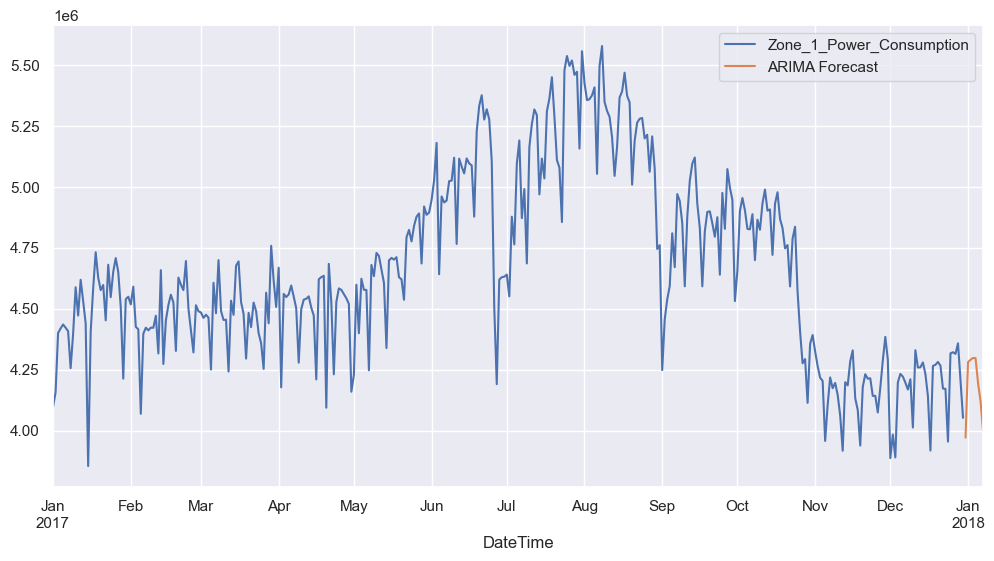

In [38]:
forecast = full_data_model.predict(start=len(df_), end=len(df_)+7, typ='levels').rename('ARIMA Forecast')

df_[column].plot(legend=True,figsize=(12,6))
forecast.plot(legend=True);

# Recurrent Neural Network

In [ ]:
import tensorflow as tf

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')